In [1]:
from __future__ import print_function
from __future__ import division
import json
import py_crepe
import datetime
import numpy as np
import data_helpers
import data
import string
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(0123)  # for reproducibility


Using Theano backend.


In [2]:
# set parameters:

subset = None

#Whether to save model parameters
save = False
model_name_path = 'params/crepe_model.json'
model_weights_path = 'params/crepe_model_weights.h5'

#Maximum length. Longer gets chopped. Shorter gets padded.
maxlen = 1014

#Model params
#Filters for conv layers
nb_filter = 256
#Number of units in the dense layer
dense_outputs = 50

#Conv layer kernel size
filter_kernels = [7, 7, 3, 3, 3, 3]
#Number of units in the final output layer. Number of classes.

#Compile/fit params
batch_size = 90
nb_epoch = 15

In [3]:
print('Loading data...')
#Expect x to be a list of sentences. Y to be a one-hot encoding of the
#categories.

authorlist=[114, 1680, 4264, 1228, 8117]
doc_id = 2032
cat_output = len(authorlist) #binary in the last layer

# def main(authorlist, doc_id):
    
    
((trainX, trainY), (valX, valY), authorlist) = data_helpers.load_ag_data(authors = authorlist, docID = doc_id)


#trainX = data_helpers.encode_data(trainX, maxlen, vocab, vocab_size, check)
#test_data = data_helpers.encode_data(valX, maxlen, vocab, vocab_size, check)

print('Build model...')

classes = len(authorlist)

model = py_crepe.model(dense_outputs, classes)

Loading data...
(391572, 12)
Min: 390
Max: 3108
(391480, 12)
Build model...


In [4]:

filepath="author-cnn-ngrams-word.hdf5"


from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint]

# Function to take input of data and return fitted model
history = model.fit(trainX, trainY, validation_data=(valX, valY), nb_epoch=30, batch_size=10, 
                    callbacks=callbacks_list)

/home/aman/anaconda2/lib/python2.7/site-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 4111 samples, validate on 1762 samples
Epoch 1/30
4111/4111 [==============================] - 0s - loss: 8.7568 - acc: 0.4342 - val_loss: 7.5193 - val_acc: 0.5335
Epoch 2/30
4111/4111 [==============================] - 0s - loss: 8.4543 - acc: 0.4631 - val_loss: 7.5193 - val_acc: 0.5335
Epoch 3/30
4111/4111 [==============================] - 0s - loss: 8.5646 - acc: 0.4534 - val_loss: 7.5193 - val_acc: 0.5335
Epoch 4/30
4111/4111 [==============================] - 0s - loss: 8.4672 - acc: 0.4593 - val_loss: 7.5193 - val_acc: 0.5335
Epoch 5/30
4111/4111 [==============================] - 0s - loss: 8.6143 - acc: 0.4510 - val_loss: 7.5193 - val_acc: 0.5335
Epoch 6/30
4111/4111 [==============================] - 0s - loss: 8.4194 - acc: 0.4576 - val_loss: 7.5193 - val_acc: 0.5335
Epoch 7/30
4111/4111 [==============================] - 0s - loss: 8.5220 - acc: 0.4563 - val_loss: 7.5193 - val_acc: 0.5335
Epoch 8/30
4111/4111 [==============================] - 0s - loss: 8.5254 - a

In [5]:
# load weights from the best checkpoint
model.load_weights(filepath)

from keras.optimizers import SGD
sgd = SGD(lr=0.01, momentum=0.9)

# Compile model again (required to make predictions)
model.compile(loss='categorical_crossentropy', optimizer=sgd,
              metrics=['accuracy'])

train_acc = (model.evaluate(trainX, trainY))[1]
print("\n\nFinal Train Accuracy: %.2f" % (train_acc * 100))

val_acc = (model.evaluate(valX, valY))[1]
print("\nFinal Test Accuracy: %.2f" % (val_acc * 100))

  32/4111 [..............................] - ETA: 0s

Final Train Accuracy: 52.74
  32/1762 [..............................] - ETA: 0s
Final Test Accuracy: 53.35


['acc', 'loss', 'val_acc', 'val_loss']


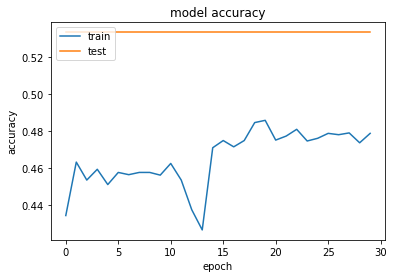

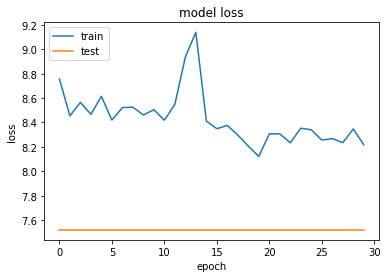

In [6]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()